In [2]:
# ==========================================
# 1️⃣ Setup and Imports
# ==========================================
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/IoMT-AD-Project/notebooks

!pip install pandas numpy matplotlib seaborn kagglehub

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

sns.set(style="whitegrid", palette="muted", font_scale=1.1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IoMT-AD-Project/notebooks


In [3]:
# ==========================================
# 2️⃣ Load Dataset
# ==========================================
path = kagglehub.dataset_download("himadri07/ciciot2023")
print("✅ Dataset downloaded to:", path)

base_path = os.path.join(path, "CICIOT23")

train_path = os.path.join(base_path, "train", "train.csv")
test_path = os.path.join(base_path, "test", "test.csv")
val_path = os.path.join(base_path, "validation", "validation.csv")

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
val_df = pd.read_csv(val_path)

print(f"Train: {train_df.shape}, Test: {test_df.shape}, Validation: {val_df.shape}")
train_df.head(10)


✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/himadri07/ciciot2023/versions/1
Train: (5491971, 47), Test: (1176851, 47), Validation: (1176851, 47)


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,757.00,6.00,64.00,23.671858,23.671858,0.0,0.0,0.0,0.0,...,538.470740,944.00,8.334058e+07,9.5,41.845546,761.456760,305219.322301,0.95,141.55,DDoS-ACK_Fragmentation
1,0.000000,54.00,6.00,64.00,2.393046,2.393046,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309327e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
2,0.033982,56.78,6.11,64.64,1.192715,1.192715,0.0,0.0,0.0,0.0,...,1.727526,54.29,8.333086e+07,9.5,10.462813,2.445286,16.853118,0.19,141.55,DDoS-PSHACK_Flood
3,0.000000,0.00,47.00,64.00,9.841972,9.841972,0.0,0.0,0.0,0.0,...,0.000000,592.00,8.370278e+07,9.5,34.409301,0.000000,0.000000,0.00,141.55,Mirai-greeth_flood
4,3.944828,108.00,6.00,64.00,0.506993,0.506993,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.297270e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
5,0.000000,0.00,1.00,64.00,42.556060,42.556060,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312470e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
6,0.000000,0.00,1.00,64.00,2.183256,2.183256,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315031e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
7,0.000000,54.00,6.00,64.00,1.883594,1.883594,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307231e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
8,0.000000,54.00,6.00,64.00,4.711073,4.711073,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309438e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
9,0.000000,0.00,1.00,64.00,4.686491,4.686491,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315005e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood


In [3]:
# ==========================================
# 3️⃣ General Dataset Information
# ==========================================
print("🧭 Basic Info:")
train_df.info()

print("\n📊 Missing Values:")
print(train_df.isnull().sum().sort_values(ascending=False).head(10))

print("\n🔢 Unique Labels:")
print(train_df["label"].value_counts())

print("\n✅ Numeric Columns Count:", len(train_df.select_dtypes(include=[np.number]).columns))
print("✅ Non-numeric Columns Count:", len(train_df.select_dtypes(exclude=[np.number]).columns))


🧭 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5491971 entries, 0 to 5491970
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27


Label distribution:
label
DDoS-ICMP_Flood            848088
DDoS-UDP_Flood             637558
DDoS-TCP_Flood             528499
DDoS-PSHACK_Flood          481254
DDoS-SYN_Flood             478653
DDoS-RSTFINFlood           475441
DDoS-SynonymousIP_Flood    422083
DoS-UDP_Flood              390422
DoS-TCP_Flood              314174
DoS-SYN_Flood              237573
BenignTraffic              129538
Mirai-greeth_flood         116133
Mirai-udpplain             104814
Mirai-greip_flood           88821
DDoS-ICMP_Fragmentation     53046
MITM-ArpSpoofing            36316
DDoS-UDP_Fragmentation      34169
DDoS-ACK_Fragmentation      33581
DNS_Spoofing                21214
Recon-HostDiscovery         15737
Recon-OSScan                11587
Recon-PortScan               9648
DoS-HTTP_Flood               8487
VulnerabilityScan            4396
DDoS-HTTP_Flood              3371
DDoS-SlowLoris               2757
DictionaryBruteForce         1541
BrowserHijacking              665
CommandInjection     

/tmp/ipython-input-2399623401.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=label_counts, x='Attack Type', y='Count', palette='viridis')


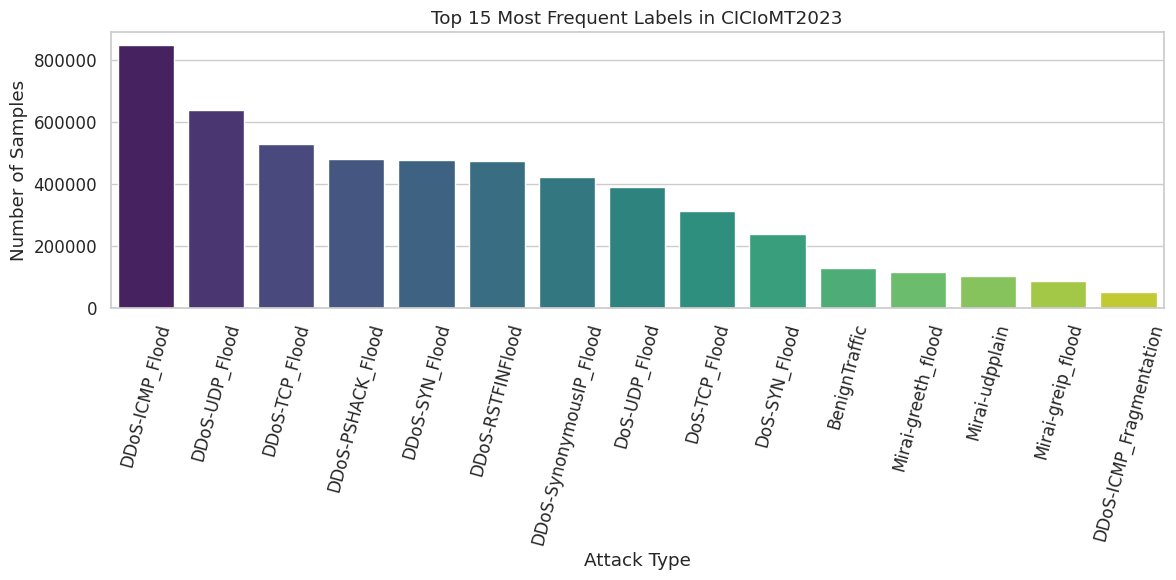

In [5]:
# ==========================================
# 4️⃣ Target (Label) Distribution
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns


print("\nLabel distribution:")
print(train_df['label'].value_counts())


# Get top 15 labels
label_counts = train_df['label'].value_counts().reset_index().head(15)
label_counts.columns = ['Attack Type', 'Count']  # rename for clarity

plt.figure(figsize=(12,6))
sns.barplot(data=label_counts, x='Attack Type', y='Count', palette='viridis')
plt.xticks(rotation=75)
plt.title("Top 15 Most Frequent Labels in CICIoMT2023")
plt.xlabel("Attack Type")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


/tmp/ipython-input-752593429.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


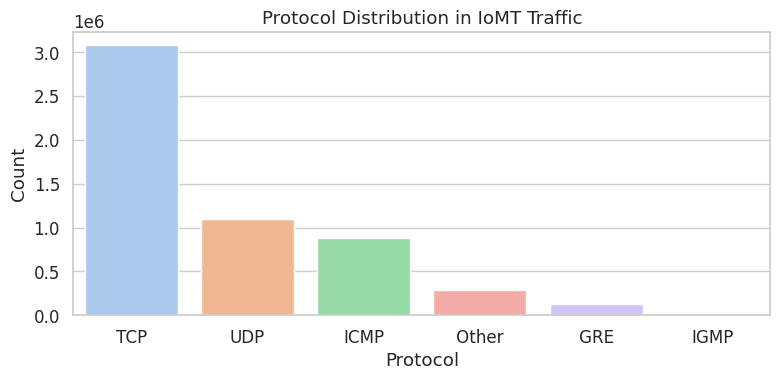

📊 Average flow stats by protocol:


,Protocol Name,flow_duration,Rate,Tot sum
0,GRE,0.004106,9281.287773,6133.209370
1,ICMP,0.010085,11695.174739,864.170377
2,IGMP,1.225731,24605.121961,7089.494324
3,Other,80.144410,9264.858800,4022.749573
4,TCP,2.106361,5540.281399,949.157504


In [4]:
# ==========================================
# 5️⃣ Protocol Type and Traffic Insights
# ==========================================

if "Protocol Type" in train_df.columns:
    # Clean up protocol values — round to nearest integer
    train_df["Protocol Type"] = train_df["Protocol Type"].round().astype(int)

    # Map known protocol numbers to names (IANA standard)
    protocol_map = {
        1: "ICMP",
        6: "TCP",
        17: "UDP",
        2: "IGMP",
        47: "GRE",
        50: "ESP",
        51: "AH",
        58: "ICMPv6",
        89: "OSPF"
    }

    train_df["Protocol Name"] = train_df["Protocol Type"].map(protocol_map).fillna("Other")

    plt.figure(figsize=(8,4))
    sns.countplot(
        x="Protocol Name",
        data=train_df,
        order=train_df["Protocol Name"].value_counts().index,
        palette="pastel"
    )
    plt.title("Protocol Distribution in IoMT Traffic")
    plt.xlabel("Protocol")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Average statistics by protocol
    proto_summary = train_df.groupby("Protocol Name").agg({
        "flow_duration": "mean",
        "Rate": "mean",
        "Tot sum": "mean"
    }).reset_index()

    print("📊 Average flow stats by protocol:")
    display(proto_summary.head())

else:
    print("⚠️ 'Protocol Type' column not found.")


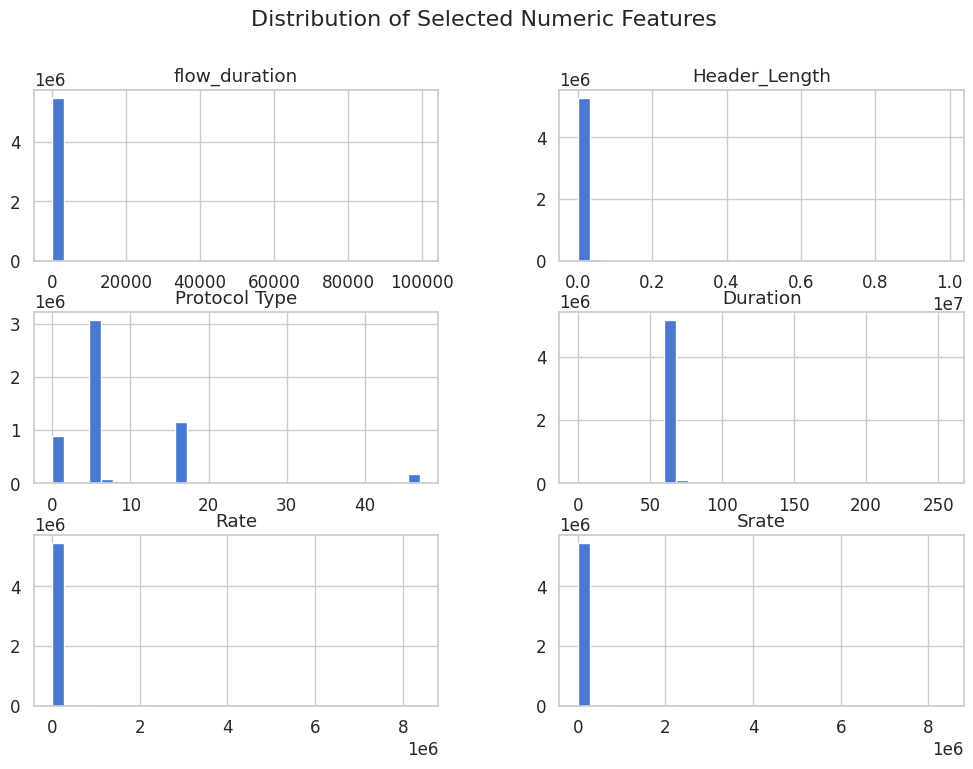

In [7]:
# ==========================================
# 6️⃣ Numeric Feature Distributions
# ==========================================
numeric_cols = train_df.select_dtypes(include=[np.number]).columns

# Plot distribution of selected features
sample_features = numeric_cols[:6]  # first 6 for readability
train_df[sample_features].hist(figsize=(12,8), bins=30)
plt.suptitle("Distribution of Selected Numeric Features", fontsize=16)
plt.show()


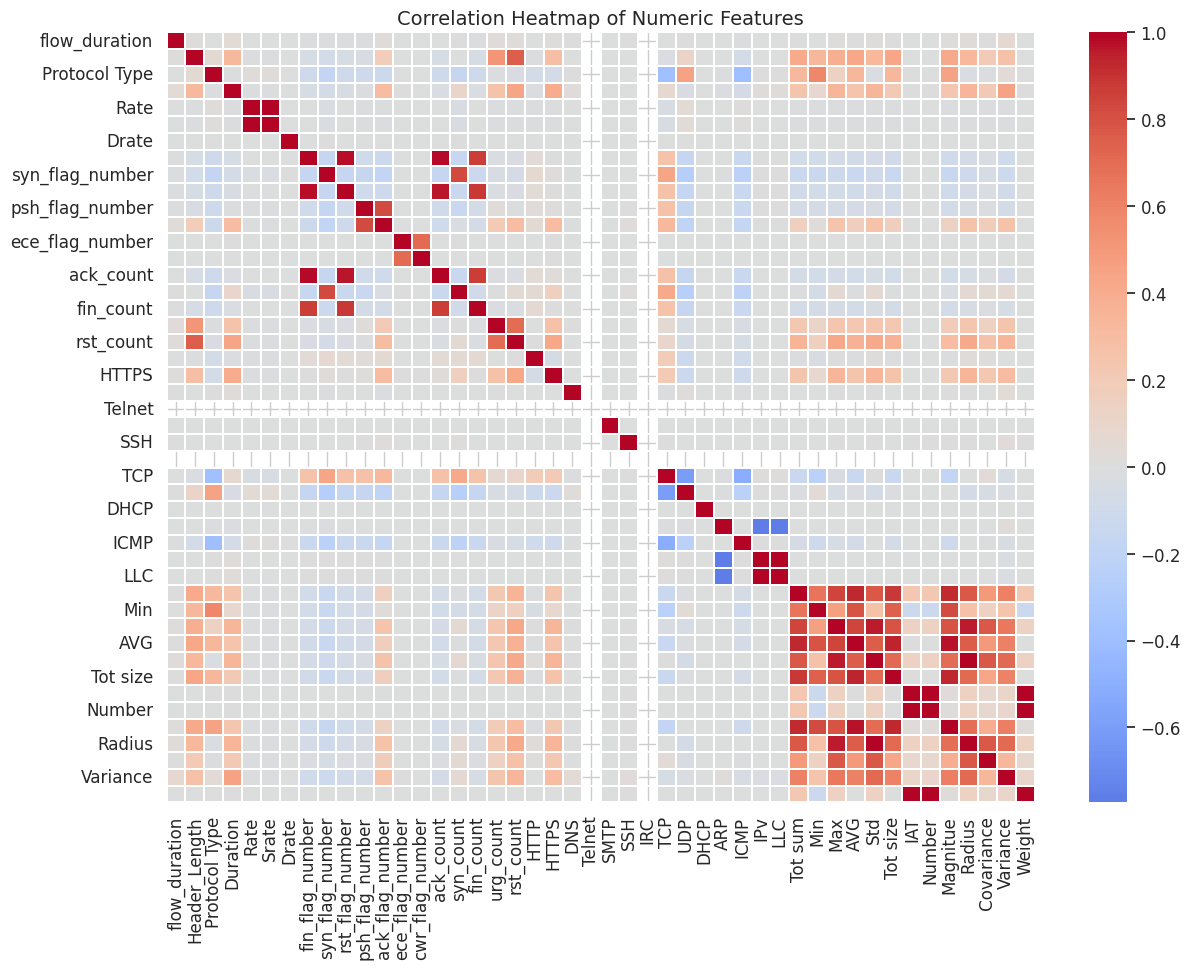

🔗 Top correlated features with 'Rate':
Srate              1.000000
Rate               1.000000
UDP                0.038967
Protocol Type      0.019013
ICMP               0.012592
fin_flag_number    0.002467
ack_count          0.001582
rst_flag_number    0.001462
IPv                0.000597
LLC                0.000597
Name: Rate, dtype: float64


In [8]:
# ==========================================
# 7️⃣ Correlation Analysis
# ==========================================
corr_matrix = train_df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, linewidths=0.3)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

# Top correlated features with Rate
if "Rate" in corr_matrix.columns:
    print("🔗 Top correlated features with 'Rate':")
    print(corr_matrix["Rate"].sort_values(ascending=False).head(10))


/tmp/ipython-input-4125755633.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_attack", y=feat, data=train_df, palette="Set2")


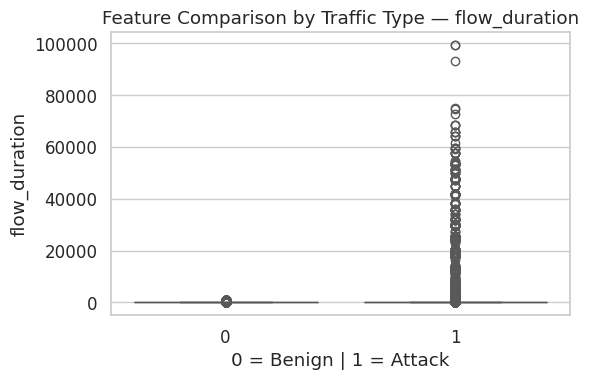

/tmp/ipython-input-4125755633.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_attack", y=feat, data=train_df, palette="Set2")


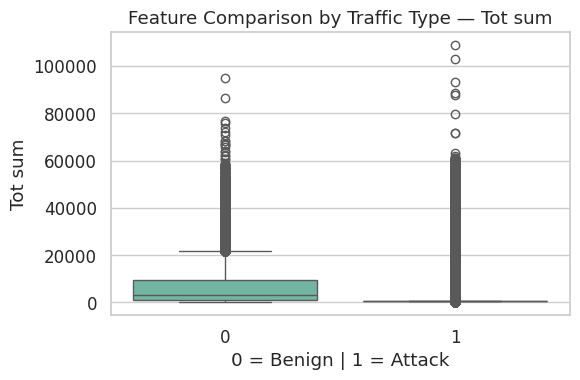

/tmp/ipython-input-4125755633.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_attack", y=feat, data=train_df, palette="Set2")


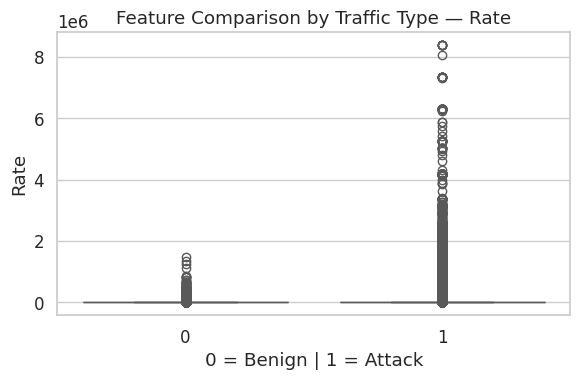

/tmp/ipython-input-4125755633.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_attack", y=feat, data=train_df, palette="Set2")


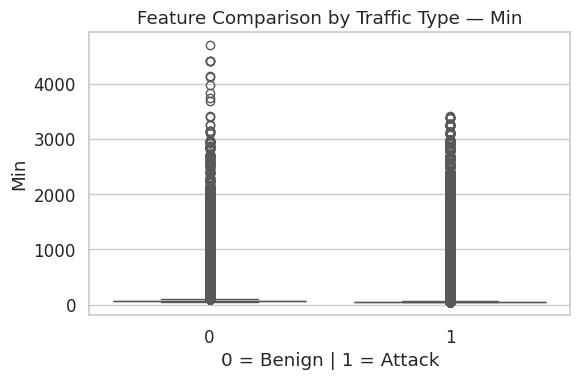

/tmp/ipython-input-4125755633.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_attack", y=feat, data=train_df, palette="Set2")


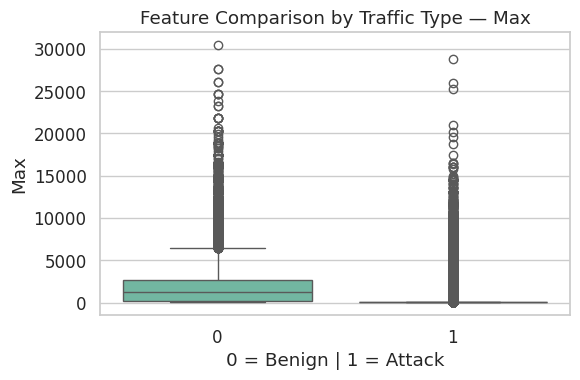

In [9]:
# ==========================================
# 8️⃣ Benign vs Attack Comparison
# ==========================================
train_df["is_attack"] = (train_df["label"] != "BenignTraffic").astype(int)

feature_compare = ["flow_duration", "Tot sum", "Rate", "Min", "Max"]
for feat in feature_compare:
    if feat in train_df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x="is_attack", y=feat, data=train_df, palette="Set2")
        plt.title(f"Feature Comparison by Traffic Type — {feat}")
        plt.xlabel("0 = Benign | 1 = Attack")
        plt.tight_layout()
        plt.show()


/tmp/ipython-input-877085641.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


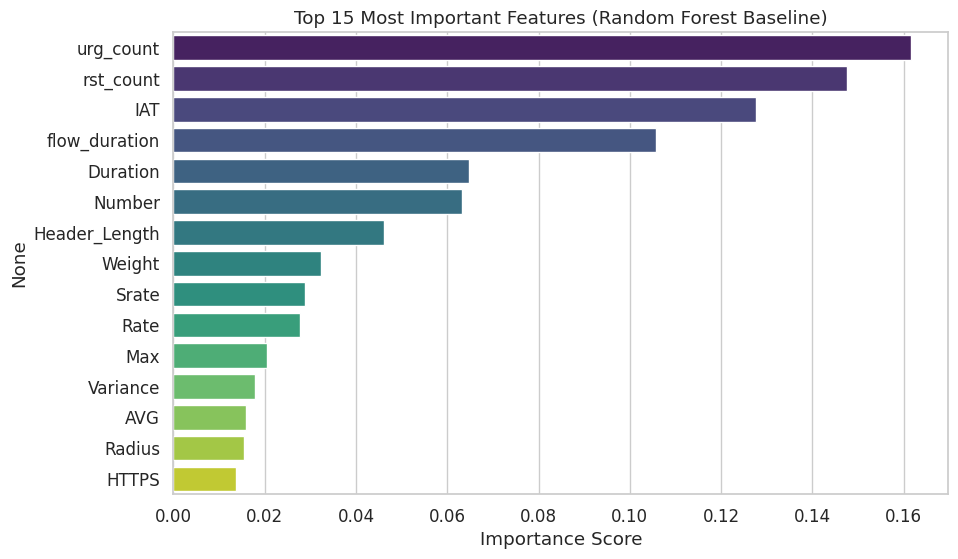

In [3]:
# ==========================================
# 9️⃣ Feature Importance (Random Forest Baseline)
# ==========================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = train_df.copy()
df = df.select_dtypes(include=[np.number]).fillna(0)

# Prepare binary target
df["is_attack"] = (train_df["label"] != "BenignTraffic").astype(int)

X = df.drop(columns=["is_attack"])
y = df["is_attack"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:15]
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Top 15 Most Important Features (Random Forest Baseline)")
plt.xlabel("Importance Score")
plt.show()
